# Bar Plots and Scatter Plots

To investigate the potential bias that movie reviews site have, <a href="">FiveThirtyEight</a> compiled data for 147 films from 2015 that have substanstive reviews from both critics and consumers. Every tune Hollywood releases a movie, critics from <a href="">Metacritic</a>, <a href="">Fandango</a>, <a href="">Rotten Tomatoes</a>, and <a href="">IMDB</a>, review and rate the film.

In [2]:
from numpy import arange
from matplotlib import pyplot as plt
import pandas as pd

# renders plots in Jupyter notebook
%matplotlib inline

# read csv file
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
rating_cols = cols[1:]
norm_reviews = reviews[cols]

To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. Here's a diagram that shows the various values we need to specify:

![](https://s3.amazonaws.com/dq-content/matplotlib_barplot_positioning.png)

We can generate a vertical bar plot using either `pyplot.bar()` or `Axes.bar()`.

**Generate a single subplot**
> `fig, ax = plt.subplots()`

The `Axes.bar()` method has 2 required parameters, **left** and **height**. Both of these parameters accept a list-like object.
- `left` to specify the *x coordinates* of the left sides of the bar (marked in blue on the above image).  
- `height` to specify the *height of each bar*.
- `width` to specify the width of each bar. The width of each bar is set to `0.8` by default. *(optional)* 

The `np.arange()` function returns evenly spaced values. We use `arange()` to generate the positions of the left side of our bars

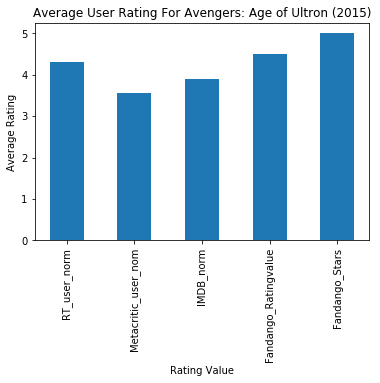

In [9]:
# generate single subplot
fig, ax = plt.subplots()

# Positions of the left sides of the 5 bars. 
bar_positions = arange(5) + 1 # [1, 2, 3, 4, 5]

# Values of the first observation
bar_heights = norm_reviews[rating_cols].iloc[0].values

# sets the width of each bar to 0.5 and create bar plot
ax.bar(bar_positions, bar_heights, 0.5)

# set x-axis tick positions
tick_positions = range(1,6)
ax.set_xticks(tick_positions)
# set x-axis tick labels and rotate to 90
ax.set_xticklabels(rating_cols, rotation=90)

# set x-axis label
ax.set_xlabel("Rating Value")
# set y-axis label
ax.set_ylabel("Average Rating")
# set plot title
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")


# display plot
plt.show()

**Customise the ticks of the bar plot**
- Change the position of the xticks | yticks:
> `ax.set_xticks([1,2,3,4,5])` | `ax.set_yticks([1,2,3,4,5])`
- We can use `Axes.set_(x/y)ticklabels()` to specify the tick labels:
> `ax.set_xticklabels(num_cols)` | `ax.set_yticklabels(num_cols)`
- Similar to other plots, we can also rotate the labels by adding the `rotation` parameter
> `ax.set_xticklabels(num_cols, rotation=90)`


**Generate a horizontal bar plot**

> `ax.barh(bar_positions, bar_widths, 0.5)`

The `Axes.barh()` method has 2 required parameters, **bottom** and **width**. Both of these parameters accept a list-like object.
- `bottom` to specify the *y coordinate* for the bottom sides for the bars.  
- `width` to specify the *lengths of the bars*.

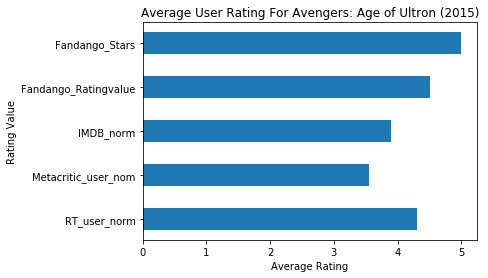

In [56]:
# generate single subplot
fig, ax = plt.subplots()

# Positions of the left sides of the 5 bars. 
bar_bottom = arange(5) + 1 # [1, 2, 3, 4, 5]

# Values of the first observation
bar_width = norm_reviews[rating_cols].iloc[0].values

# sets the width of each bar to 0.5 and create bar plot
ax.barh(bar_bottom, bar_width, 0.5)

# set y-axis tick positions
tick_positions = range(1,6)
ax.set_yticks(tick_positions)
# set y-axis tick labels and rotate to 90
ax.set_yticklabels(rating_cols)

# set y-axis label
ax.set_ylabel("Rating Value")
# set x-axis label
ax.set_xlabel("Average Rating")
# set plot title
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")

plt.show()

---
## Scatter Plot

A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the <a href="https://en.wikipedia.org/wiki/Correlation_coefficient">correlation coefficient</a> will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.

To generate a scatter plot, we use `Axes.scatter()`. The `scatter()` method has 2 required parameters, **x** and **y**, which matches the parameters of the `plot()` method. 

The values for these parameters need to be iterable objects of matching lengths (*lists, NumPy arrays, or pandas series*).

Let's start by creating a scatter plot that visualizes the relationship between the **Fandango_Ratingvalue** and **RT_user_norm** columns. We're looking for at least a weak correlation between the columns.

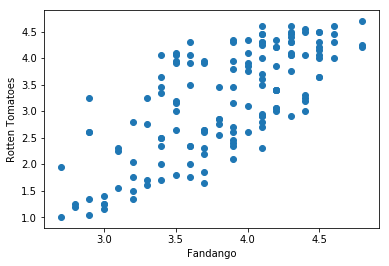

In [63]:
# create a single subplot
fig, ax = plt.subplots()

# generate scatter plot
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])

# set x and y labels
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')

# display plot
plt.show()

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. 
- The correlation is *weak* because for many x values, there are multiple corresponding y values. 
- The correlation is *positive* because, in general, as x increases, y also increases.

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis.

We can use `Axes.set_xlim()` and `Axes.set_ylim()` to set the data limits for both axes:
> `ax.set_xlim(0, 5)` <br/>
> `ax.set_ylim(0, 5)`

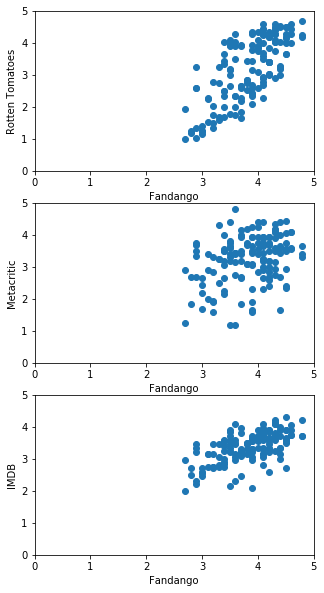

In [65]:
# Generate 3 scatter plots
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# subplot ax1
ax1.scatter(norm_reviews.Fandango_Ratingvalue, norm_reviews.RT_user_norm)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

# subplot ax2
ax2.scatter(norm_reviews.Fandango_Ratingvalue, norm_reviews.Metacritic_user_nom)
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

# subplot ax3
ax3.scatter(norm_reviews.Fandango_Ratingvalue, norm_reviews.IMDB_norm)
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

# display plot
plt.show()

From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. 

We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

In [5]:
norm_reviews[rating_cols].iloc[0].values

array([4.3 , 3.55, 3.9 , 4.5 , 5.  ])